<a href="https://colab.research.google.com/github/kriti5/ai-ml/blob/main/ml/regression/Regularised_regression_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetes test set with Lasso, Ridge nd Elastic Net**

In [2]:
from sklearn.datasets import load_diabetes

In [11]:
data = load_diabetes()

In [4]:
import pandas as pd
import numpy as np

In [5]:
data.keys()


dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [13]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [14]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [25]:
df = pd.DataFrame(data = data.data, columns=data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
#Let's Check for correlation first
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


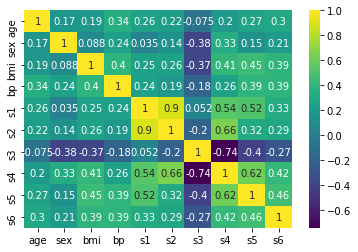

In [26]:
import seaborn as sns
sns.heatmap(df.corr(), annot= True, cmap = 'viridis')

In [29]:
#s1 and s2 have high correlation. Dropping s1
df.drop("s1", axis=1, inplace = True)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, data.target , test_size = 0.2 , random_state = 21)

In [33]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (353, 9)
y_train:  (353,)
x_test:  (89, 9)
y_test:  (89,)


**Building the Regularised models**

Ridge

In [34]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
#lambda - penality in the algo is known as alpha


In [35]:
ridge_model.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
y_test_pred = ridge_model.predict(x_test)
y_train_pred = ridge_model.predict(x_train)

In [37]:
from sklearn.metrics import mean_squared_error


In [38]:
print("RMSE for train set", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RMSE for test set", np.sqrt(mean_squared_error(y_test, y_test_pred)))
#model is rejected as test RMSE is greater

RMSE for train set 57.10530667238962
RMSE for test set 60.26827682642164


In [41]:
#Let's try by changing penality values
ridge_model2 = Ridge(alpha=3)
ridge_model2.fit(x_train, y_train)

Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [43]:
y_test_pred2 = ridge_model2.predict(x_test)
y_train_pred2 = ridge_model2.predict(x_train)

In [44]:
print("RMSE for train set Model2", np.sqrt(mean_squared_error(y_train, y_train_pred2)))
print("RMSE for test set Model2", np.sqrt(mean_squared_error(y_test, y_test_pred2)))
#model is rejected as test RMSE is greater

RMSE for train set Model2 63.061579847967025
RMSE for test set Model2 64.26003912193431


In [45]:
#Let's try by changing penality values
ridge_model3 = Ridge(alpha=0.2)
ridge_model3.fit(x_train, y_train)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
y_test_pred3 = ridge_model3.predict(x_test)
y_train_pred3 = ridge_model3.predict(x_train)

In [47]:
print("RMSE for train set Model3", np.sqrt(mean_squared_error(y_train, y_train_pred3)))
print("RMSE for test set Model3", np.sqrt(mean_squared_error(y_test, y_test_pred3)))
#model is rejected as test RMSE is greater

RMSE for train set Model3 53.58280741829105
RMSE for test set Model3 57.290012967204284


In [56]:
#let's try some random values between 0.1 to 10
for i in range(1,10,1):
  ridge_model = Ridge(alpha=i)
  ridge_model.fit(x_train, y_train)
  y_test_pred = ridge_model.predict(x_test)
  y_train_pred = ridge_model.predict(x_train)
  RMSE_test = np.sqrt(mean_squared_error(y_test_pred, y_test))
  RMSE_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
  if (RMSE_test <= RMSE_train):
    print("For alpha ", i," -- RMSE Train: ",RMSE_train,"  -- RMSE Test: ",RMSE_test)

For alpha  6  -- RMSE Train:  67.54299379576376   -- RMSE Test:  67.24762242337836
For alpha  7  -- RMSE Train:  68.48690830613762   -- RMSE Test:  67.89104428978511
For alpha  8  -- RMSE Train:  69.27071077020159   -- RMSE Test:  68.42967124714505
For alpha  9  -- RMSE Train:  69.93168705406254   -- RMSE Test:  68.88701685733642


In [57]:
#Although RMSE_train > RMSE_test for 8,9.
# but RMSE is very high which is why we reject the model

**Lasso Regression**

In [58]:
from sklearn.linear_model import Lasso

In [62]:
for i in range(1,10):
  lasso_model = Lasso(alpha=i)
  lasso_model.fit(x_train, y_train)
  y_test_pred = lasso_model.predict(x_test)
  y_train_pred = lasso_model.predict(x_train)
  RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
  RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
  if (RMSE_test < RMSE_train):
    print("For alpha ", i," -- RMSE Train: ",RMSE_train,"  -- RMSE Test: ",RMSE_train)

For alpha  2  -- RMSE Train:  74.53525597975872   -- RMSE Test:  74.53525597975872
For alpha  3  -- RMSE Train:  77.64256109178886   -- RMSE Test:  77.64256109178886
For alpha  4  -- RMSE Train:  77.64256109178886   -- RMSE Test:  77.64256109178886
For alpha  5  -- RMSE Train:  77.64256109178886   -- RMSE Test:  77.64256109178886
For alpha  6  -- RMSE Train:  77.64256109178886   -- RMSE Test:  77.64256109178886
For alpha  7  -- RMSE Train:  77.64256109178886   -- RMSE Test:  77.64256109178886
For alpha  8  -- RMSE Train:  77.64256109178886   -- RMSE Test:  77.64256109178886
For alpha  9  -- RMSE Train:  77.64256109178886   -- RMSE Test:  77.64256109178886


In [63]:
#Lasso rejected as well as RMSE is very high

Elastic Net

In [64]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet()

In [66]:
elastic_reg.fit(x_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
y_test_pred5 = elastic_reg.predict(x_test)

y_train_pred5 = elastic_reg.predict(x_train)

In [68]:
print("RMSE for train set Model5", np.sqrt(mean_squared_error(y_train, y_train_pred5)))
print("RMSE for test set Model5", np.sqrt(mean_squared_error(y_test, y_test_pred5)))
#model is rejected as test RMSE is greater

RMSE for train set Model5 77.2594783882678
RMSE for test set Model5 74.14401097789118


In [ ]:
#RMSE is very high, model is rejected. 
#We need more data or need to choose some other model